<a href="https://colab.research.google.com/github/tesseract314/DS-Unit-4-Sprint-2-NLP/blob/master/LS_DS_422_BOW_Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<img align="left" src="https://lever-client-logos.s3.amazonaws.com/864372b1-534c-480e-acd5-9711f850815c-1524247202159.png" width=200>
<br></br>
<br></br>

## *Data Science Unit 4 Sprint 2 Assignment 2*

# Document Representations: Bag-Of-Words

In [1]:
import re
import string

!pip install -U nltk

import nltk
nltk.download('punkt')
nltk.download('stopwords')
from nltk.tokenize import sent_tokenize # Sentence Tokenizer
from nltk.tokenize import word_tokenize # Word Tokenizer
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from nltk.stem.wordnet import WordNetLemmatizer
from nltk.probability import FreqDist

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

Requirement already up-to-date: nltk in /usr/local/lib/python3.6/dist-packages (3.4.1)


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [0]:
pd.set_option('max_colwidth', 600)
pd.set_option("display.max_rows", None)
pd.set_option("display.max_columns", None)

# 1) (optional) Scrape 100 Job Listings that contain the title "Data Scientist" from indeed.com

At a minimum your final dataframe of job listings should contain
- Job Title
- Job Description

If you choose to not to scrape the data, there is a CSV with outdated data in the directory. Remeber, if you scrape Indeed, you're helping yourself find a job. ;)

In [34]:
df = pd.read_csv('https://raw.githubusercontent.com/LambdaSchool/DS-Unit-4-Sprint-2-NLP/master/module2-Bag-of-Words/job_listings.csv')
df.head()

,Unnamed: 0,description,title
0,0,"b""<div><div>Job Requirements:</div><ul><li><p>\nConceptual understanding in Machine Learning models like Nai\xc2\xa8ve Bayes, K-Means, SVM, Apriori, Linear/ Logistic Regression, Neural, Random Forests, Decision Trees, K-NN along with hands-on experience in at least 2 of them</p>\n</li><li><p>Intermediate to expert level coding skills in Python/R. (Ability to write functions, clean and efficient data manipulation are mandatory for this role)</p>\n</li><li><p>Exposure to packages like NumPy, SciPy, Pandas, Matplotlib etc in Python or GGPlot2, dplyr, tidyR in R</p>\n</li><li><p>Ability to com...",Data scientist
1,1,"b'<div>Job Description<br/>\n<br/>\n<p>As a Data Scientist 1, you will help us build machine learning models, data pipelines, and micro-services to help our clients navigate their healthcare journey. You will do so by empowering and improving the next generation of Accolade Applications and user experiences.</p><p><b>\nA day in the life\xe2\x80\xa6</b></p><ul><li>\nWork with a small agile team to design and develop mobile applications in an iterative fashion.</li><li>\nWork with a tight-knit group of development team members in Seattle.</li><li>\nContribute to best practices and help guide...",Data Scientist I
2,2,"b'<div><p>As a Data Scientist you will be working on consulting side of our business. You will be responsible for analyzing large, complex datasets and identify meaningful patterns that lead to actionable recommendations. You will be performing thorough testing and validation of models, and support various aspects of the business with data analytics.</p><ul><li>\nAbility to do statistical modeling, build predictive models and leverage machine learning algorithms.</li><li>\nThis position will combine the typical Data Scientist math and analytical skills, with research, advanced business, co...",Data Scientist - Entry Level
3,3,"b'<div class=""jobsearch-JobMetadataHeader icl-u-xs-mb--md""><div class=""jobsearch-JobMetadataHeader-item ""><span class=""icl-u-xs-mr--xs"">$4,969 - $6,756 a month</span></div><div class=""jobsearch-JobMetadataHeader-item icl-u-xs-mt--xs"">Contract</div></div><div>Under the general supervision of Professors Dana Mukamel and Kai Zheng, the incumbent will join the CalMHSA Mental Health Tech Suite Innovation (INN) Evaluation Team. This large, statewide multi-year study will evaluate the effectiveness of two new and innovative applications offered to people with mental health conditions, which inclu...",Data Scientist
4,4,"b'<ul><li>Location: USA \xe2\x80\x93 multiple locations</li>\n<li>2+ years of Analytics experience</li>\n<li>Understand business requirements and technical requirements</li>\n<li>Can handle data extraction, preparation and transformation</li>\n<li>Create and implement data models</li></ul>'",Data Scientist


In [3]:
df.shape

(426, 3)

## 2) Use NLTK to tokenize / clean the listings 

In [35]:
df['description'] = df['description'].apply(word_tokenize)
df.head()

,Unnamed: 0,description,title
0,0,"[b, '', <, div, >, <, div, >, Job, Requirements, :, <, /div, >, <, ul, >, <, li, >, <, p, >, \nConceptual, understanding, in, Machine, Learning, models, like, Nai\xc2\xa8ve, Bayes, ,, K-Means, ,, SVM, ,, Apriori, ,, Linear/, Logistic, Regression, ,, Neural, ,, Random, Forests, ,, Decision, Trees, ,, K-NN, along, with, hands-on, experience, in, at, least, 2, of, them, <, /p, >, \n, <, /li, >, <, li, >, <, p, >, Intermediate, to, expert, level, coding, skills, in, Python/R, ., (, Ability, to, write, functions, ,, clean, and, efficient, data, manipulation, are, mandatory, for, this, role, ...]",Data scientist
1,1,"[b, ', <, div, >, Job, Description, <, br/, >, \n, <, br/, >, \n, <, p, >, As, a, Data, Scientist, 1, ,, you, will, help, us, build, machine, learning, models, ,, data, pipelines, ,, and, micro-services, to, help, our, clients, navigate, their, healthcare, journey, ., You, will, do, so, by, empowering, and, improving, the, next, generation, of, Accolade, Applications, and, user, experiences., <, /p, >, <, p, >, <, b, >, \nA, day, in, the, life\xe2\x80\xa6, <, /b, >, <, /p, >, <, ul, >, <, li, >, \nWork, with, a, small, agile, team, to, design, and, develop, ...]",Data Scientist I
2,2,"[b, ', <, div, >, <, p, >, As, a, Data, Scientist, you, will, be, working, on, consulting, side, of, our, business, ., You, will, be, responsible, for, analyzing, large, ,, complex, datasets, and, identify, meaningful, patterns, that, lead, to, actionable, recommendations, ., You, will, be, performing, thorough, testing, and, validation, of, models, ,, and, support, various, aspects, of, the, business, with, data, analytics., <, /p, >, <, ul, >, <, li, >, \nAbility, to, do, statistical, modeling, ,, build, predictive, models, and, leverage, machine, learning, algorithms., <, /li, >, <, li,...",Data Scientist - Entry Level
3,3,"[b, ', <, div, class=, '', jobsearch-JobMetadataHeader, icl-u-xs-mb, --, md, '', >, <, div, class=, '', jobsearch-JobMetadataHeader-item, ``, >, <, span, class=, '', icl-u-xs-mr, --, xs, '', >, $, 4,969, -, $, 6,756, a, month, <, /span, >, <, /div, >, <, div, class=, '', jobsearch-JobMetadataHeader-item, icl-u-xs-mt, --, xs, '', >, Contract, <, /div, >, <, /div, >, <, div, >, Under, the, general, supervision, of, Professors, Dana, Mukamel, and, Kai, Zheng, ,, the, incumbent, will, join, the, CalMHSA, Mental, Health, Tech, Suite, Innovation, (, INN, ), Evaluation, Team, ., This, large, ,, s...",Data Scientist
4,4,"[b, ', <, ul, >, <, li, >, Location, :, USA, \xe2\x80\x93, multiple, locations, <, /li, >, \n, <, li, >, 2+, years, of, Analytics, experience, <, /li, >, \n, <, li, >, Understand, business, requirements, and, technical, requirements, <, /li, >, \n, <, li, >, Can, handle, data, extraction, ,, preparation, and, transformation, <, /li, >, \n, <, li, >, Create, and, implement, data, models, <, /li, >, <, /ul, >, ']",Data Scientist


In [0]:
def rm_non_alpha(series):
  words = [word for word in series if word.isalpha()]
  return words

In [36]:
df['description'] = df['description'].apply(rm_non_alpha)
df.head()

,Unnamed: 0,description,title
0,0,"[b, div, div, Job, Requirements, ul, li, p, understanding, in, Machine, Learning, models, like, Bayes, SVM, Apriori, Logistic, Regression, Neural, Random, Forests, Decision, Trees, along, with, experience, in, at, least, of, them, li, p, Intermediate, to, expert, level, coding, skills, in, Ability, to, write, functions, clean, and, efficient, data, manipulation, are, mandatory, for, this, role, li, p, Exposure, to, packages, like, NumPy, SciPy, Pandas, Matplotlib, etc, in, Python, or, dplyr, tidyR, in, R, li, p, Ability, to, communicate, Model, findings, to, both, Technical, and, stake, ho...",Data scientist
1,1,"[b, div, Job, Description, p, As, a, Data, Scientist, you, will, help, us, build, machine, learning, models, data, pipelines, and, to, help, our, clients, navigate, their, healthcare, journey, You, will, do, so, by, empowering, and, improving, the, next, generation, of, Accolade, Applications, and, user, p, b, day, in, the, ul, li, with, a, small, agile, team, to, design, and, develop, mobile, applications, in, an, iterative, li, with, a, group, of, development, team, members, in, li, to, best, practices, and, help, guide, the, future, of, our, li, effectively, as, a, collaborative, member...",Data Scientist I
2,2,"[b, div, p, As, a, Data, Scientist, you, will, be, working, on, consulting, side, of, our, business, You, will, be, responsible, for, analyzing, large, complex, datasets, and, identify, meaningful, patterns, that, lead, to, actionable, recommendations, You, will, be, performing, thorough, testing, and, validation, of, models, and, support, various, aspects, of, the, business, with, data, ul, li, to, do, statistical, modeling, build, predictive, models, and, leverage, machine, learning, li, position, will, combine, the, typical, Data, Scientist, math, and, analytical, skills, with, research...",Data Scientist - Entry Level
3,3,"[b, div, md, div, span, xs, a, month, div, xs, Contract, div, Under, the, general, supervision, of, Professors, Dana, Mukamel, and, Kai, Zheng, the, incumbent, will, join, the, CalMHSA, Mental, Health, Tech, Suite, Innovation, INN, Evaluation, Team, This, large, statewide, study, will, evaluate, the, effectiveness, of, two, new, and, innovative, applications, offered, to, people, with, mental, health, conditions, which, include, opportunities, for, online, chatting, between, users, and, online, listeners, Responsibilities, of, the, incumbent, will, include, managing, and, analyzing, text, ...",Data Scientist
4,4,"[b, ul, li, Location, USA, multiple, locations, li, years, of, Analytics, experience, li, Understand, business, requirements, and, technical, requirements, li, Can, handle, data, extraction, preparation, and, transformation, li, Create, and, implement, data, models]",Data Scientist


In [0]:
def rm_stopwords(series):
  stop_words = stopwords.words('english')
  words = [w for w in series if not w in stop_words]
  return words

In [37]:
df['description'] = df['description'].apply(rm_stopwords)
df.head()

,Unnamed: 0,description,title
0,0,"[b, div, div, Job, Requirements, ul, li, p, understanding, Machine, Learning, models, like, Bayes, SVM, Apriori, Logistic, Regression, Neural, Random, Forests, Decision, Trees, along, experience, least, li, p, Intermediate, expert, level, coding, skills, Ability, write, functions, clean, efficient, data, manipulation, mandatory, role, li, p, Exposure, packages, like, NumPy, SciPy, Pandas, Matplotlib, etc, Python, dplyr, tidyR, R, li, p, Ability, communicate, Model, findings, Technical, stake, holders, li, p, Hands, experience, similar, programming, language, li, p, Must, show, past, work, ...",Data scientist
1,1,"[b, div, Job, Description, p, As, Data, Scientist, help, us, build, machine, learning, models, data, pipelines, help, clients, navigate, healthcare, journey, You, empowering, improving, next, generation, Accolade, Applications, user, p, b, day, ul, li, small, agile, team, design, develop, mobile, applications, iterative, li, group, development, team, members, li, best, practices, help, guide, future, li, effectively, collaborative, member, development, li, effectively, individual, quick, turnaround, enhancements, li, meeting, expectations, deliverables, time, high, li, implement, new, feat...",Data Scientist I
2,2,"[b, div, p, As, Data, Scientist, working, consulting, side, business, You, responsible, analyzing, large, complex, datasets, identify, meaningful, patterns, lead, actionable, recommendations, You, performing, thorough, testing, validation, models, support, various, aspects, business, data, ul, li, statistical, modeling, build, predictive, models, leverage, machine, learning, li, position, combine, typical, Data, Scientist, math, analytical, skills, research, advanced, business, communication, presentation, li, job, location, Sacramento, option, jobSectionHeader, b, ul, li, MS, PhD, relevan...",Data Scientist - Entry Level
3,3,"[b, div, md, div, span, xs, month, div, xs, Contract, div, Under, general, supervision, Professors, Dana, Mukamel, Kai, Zheng, incumbent, join, CalMHSA, Mental, Health, Tech, Suite, Innovation, INN, Evaluation, Team, This, large, statewide, study, evaluate, effectiveness, two, new, innovative, applications, offered, people, mental, health, conditions, include, opportunities, online, chatting, users, online, listeners, Responsibilities, incumbent, include, managing, analyzing, text, data, created, users, two, mental, health, applications, part, research, evaluation, objectives, team, The, i...",Data Scientist
4,4,"[b, ul, li, Location, USA, multiple, locations, li, years, Analytics, experience, li, Understand, business, requirements, technical, requirements, li, Can, handle, data, extraction, preparation, transformation, li, Create, implement, data, models]",Data Scientist


In [0]:
def mk_lower(series):
  words = [word.lower() for word in series]
  return words

In [39]:
df['description'] = df['description'].apply(mk_lower)
df.head()

,Unnamed: 0,description,title
0,0,"[b, div, div, job, requirements, ul, li, p, understanding, machine, learning, models, like, bayes, svm, apriori, logistic, regression, neural, random, forests, decision, trees, along, experience, least, li, p, intermediate, expert, level, coding, skills, ability, write, functions, clean, efficient, data, manipulation, mandatory, role, li, p, exposure, packages, like, numpy, scipy, pandas, matplotlib, etc, python, dplyr, tidyr, r, li, p, ability, communicate, model, findings, technical, stake, holders, li, p, hands, experience, similar, programming, language, li, p, must, show, past, work, ...",Data scientist
1,1,"[b, div, job, description, p, as, data, scientist, help, us, build, machine, learning, models, data, pipelines, help, clients, navigate, healthcare, journey, you, empowering, improving, next, generation, accolade, applications, user, p, b, day, ul, li, small, agile, team, design, develop, mobile, applications, iterative, li, group, development, team, members, li, best, practices, help, guide, future, li, effectively, collaborative, member, development, li, effectively, individual, quick, turnaround, enhancements, li, meeting, expectations, deliverables, time, high, li, implement, new, feat...",Data Scientist I
2,2,"[b, div, p, as, data, scientist, working, consulting, side, business, you, responsible, analyzing, large, complex, datasets, identify, meaningful, patterns, lead, actionable, recommendations, you, performing, thorough, testing, validation, models, support, various, aspects, business, data, ul, li, statistical, modeling, build, predictive, models, leverage, machine, learning, li, position, combine, typical, data, scientist, math, analytical, skills, research, advanced, business, communication, presentation, li, job, location, sacramento, option, jobsectionheader, b, ul, li, ms, phd, relevan...",Data Scientist - Entry Level
3,3,"[b, div, md, div, span, xs, month, div, xs, contract, div, under, general, supervision, professors, dana, mukamel, kai, zheng, incumbent, join, calmhsa, mental, health, tech, suite, innovation, inn, evaluation, team, this, large, statewide, study, evaluate, effectiveness, two, new, innovative, applications, offered, people, mental, health, conditions, include, opportunities, online, chatting, users, online, listeners, responsibilities, incumbent, include, managing, analyzing, text, data, created, users, two, mental, health, applications, part, research, evaluation, objectives, team, the, i...",Data Scientist
4,4,"[b, ul, li, location, usa, multiple, locations, li, years, analytics, experience, li, understand, business, requirements, technical, requirements, li, can, handle, data, extraction, preparation, transformation, li, create, implement, data, models]",Data Scientist


# 3) Use Scikit-Learn's CountVectorizer to get word counts for each listing.

In [0]:
job_listings = df['description'].tolist()

In [48]:
listings = []
for listing in job_listings:
  new_listing = " ".join(listing)
  listings.append(new_listing)
  
listings

['b div div job requirements ul li p understanding machine learning models like bayes svm apriori logistic regression neural random forests decision trees along experience least li p intermediate expert level coding skills ability write functions clean efficient data manipulation mandatory role li p exposure packages like numpy scipy pandas matplotlib etc python dplyr tidyr r li p ability communicate model findings technical stake holders li p hands experience similar programming language li p must show past work via github kaggle published article li p master degree science quant specific div div div div div div now div',
 'b div job description p as data scientist help us build machine learning models data pipelines help clients navigate healthcare journey you empowering improving next generation accolade applications user p b day ul li small agile team design develop mobile applications iterative li group development team members li best practices help guide future li effectively co

In [49]:
vectorizer = CountVectorizer()

bag_of_words = vectorizer.fit_transform(listings)

print(bag_of_words.toarray())

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


In [52]:
feature_names = vectorizer.get_feature_names()

data = pd.DataFrame(bag_of_words.toarray(), columns=feature_names)
data.head()

ab  abernathy  abilities  ability  able  abounds  about  above  abroad  \
0   0          0          0        2     0        0      0      0       0   
1   0          0          0        1     0        0      0      0       0   
2   0          0          0        0     0        0      0      0       0   
3   0          0          0        0     0        0      0      0       0   
4   0          0          0        0     0        0      0      0       0   

   absence  absolutely  absorbing  abstract  abstracting  abstraction  \
0        0           0          0         0            0            0   
1        0           0          0         0            0            0   
2        0           0          0         0            0            0   
3        0           0          0         0            0            0   
4        0           0          0         0            0            0   

   abstractions  abstractly  abundant  abuse  academia  academic  academics  \
0             0           0         0      0         0         0          0   
1             0           0         0      0         0         0          0   
2             0           0         0      0         0         0          0   
3             0           0         0      0         0         0          0   
4             0           0         0      0         0         0          0   

   academies  accelerate  accelerates  accelerating  accelerator  \
0          0           0            0             0            0   
1          0           0            0             0            0   
2          0           0            0             0            0   
3          0           0            0             0            0   
4          0           0            0             0            0   

   accelerometer  accept  acceptable  acceptance  accepted  accepting  access  \
0              0       0           0           0         0          0       0   
1              0       0           0           0         0          0       0   
2              0       0           0           0         0          0       0   
3              0       0           0           0         0          0       0   
4              0       0           0           0         0          0       0   

   accessibility  accessible  accessing  accidental  accolade  accolades  \
0              0           0          0           0         0          0   
1              0           0          0           0         1          0   
2              0           0          0           0         0          0   
3              0           0          0           0         0          0   
4              0           0          0           0         0          0   

   accommodate  accommodating  accommodation  accommodations  accomplish  \
0            0              0              0               0           0   
1            0              0              0               0           0   
2            0              0              0               0           0   
3            0              0              0               0           0   
4            0              0              0               0           0   

   accomplished  accomplishment  accomplishments  accordance  according  \
0             0               0                0           0          0   
1             0               0                0           0          1   
2             0               0                0           0          0   
3             0               0                0           0          0   
4             0               0                0           0          0   

   account  accountability  accountable  accountants  accounting  accounts  \
0        0               0            0            0           0         0   
1        0               0            0            0           0         0   
2        0               0            0            0           0         0   
3        0               0            0            0 

In [57]:
data['scraping'].value_counts(normalize=True)

0    0.992958
1    0.007042
Name: scraping, dtype: float64

# 4) Visualize the most common word counts

In [75]:
type(df.sum())

pandas.core.series.Series

In [77]:
subset = pd.DataFrame(data.sum(), columns=['sum_of_words'])
subset.head()

,sum_of_words
ab,4
abernathy,3
abilities,37
ability,429
able,138


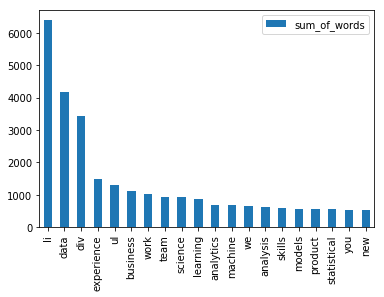

In [83]:
subset.sort_values('sum_of_words', ascending=False).head(20).plot.bar()

 # 5) Use Scikit-Learn's tfidfVectorizer to get a TF-IDF feature matrix

In [84]:
tfidf = TfidfVectorizer(max_features=20)

feature_matrix = tfidf.fit_transform(listings)

print(feature_matrix.toarray())

feature_names = tfidf.get_feature_names()

df = pd.DataFrame(feature_matrix.toarray(), columns=feature_names)
df.head()

[[0.         0.         0.         ... 0.         0.08705858 0.        ]
 [0.         0.         0.03663273 ... 0.         0.06865125 0.04866175]
 [0.         0.         0.40266463 ... 0.         0.         0.3565912 ]
 ...
 [0.         0.         0.04919043 ... 0.28206325 0.         0.        ]
 [0.03071777 0.         0.02881762 ... 0.03304867 0.0540054  0.0382804 ]
 [0.09907107 0.11227511 0.0929427  ... 0.10658871 0.26126767 0.        ]]


,analysis,analytics,business,data,div,experience,learning,li,machine,models,new,product,science,skills,statistical,team,ul,we,work,you
0,0.0,0.000000,0.000000,0.072260,0.768716,0.156516,0.096143,0.560856,0.103345,0.112532,0.000000,0.000000,0.090033,0.100528,0.000000,0.000000,0.080122,0.0,0.087059,0.000000
1,0.0,0.000000,0.036633,0.113963,0.067353,0.092567,0.113723,0.947723,0.122242,0.044369,0.087580,0.098148,0.070997,0.000000,0.000000,0.105475,0.063182,0.0,0.068651,0.048662
2,0.0,0.000000,0.402665,0.313167,0.123391,0.000000,0.138893,0.578740,0.149297,0.325137,0.000000,0.000000,0.130065,0.145226,0.153534,0.000000,0.231496,0.0,0.000000,0.356591
3,0.0,0.000000,0.000000,0.287989,0.680822,0.000000,0.000000,0.000000,0.000000,0.000000,0.221318,0.000000,0.000000,0.000000,0.000000,0.533080,0.000000,0.0,0.346970,0.000000
4,0.0,0.235149,0.194659,0.302787,0.000000,0.163961,0.000000,0.839335,0.000000,0.235770,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.167867,0.0,0.000000,0.000000


## Stretch Goals

 - Scrape Job Listings for the job title "Data Analyst". How do these differ from Data Scientist Job Listings
 - Try and identify requirements for experience specific technologies that are asked for in the job listings. How are those distributed among the job listings?
 - Use a clustering algorithm to cluster documents by their most important terms. Do the clusters reveal any common themes?
  - **Hint:** K-means might not be the best algorithm for this. Do a little bit of research to see what might be good for this. Also, remember that algorithms that depend on Euclidean distance break down with high dimensional data.